# 情報活用講座：　ケモインフォマテックス 編　
# 第1回：　RDKitを知る

## RDKitライブラリについて

RDKitはPythonで使用されるオープンソースの化学情報処理のアプリケーションで、分子の描画、化学構造の解析、化学反応の構築などの機能を提供します。

___

**RDKitの強み**  
RDKitは分子の構造から特性を計算するための多くの関数やアルゴリズムを実装しています。また、化学反応の予測や合成経路の設計など、さまざまな化学的なタスクをサポートしています。化学分野で一般的なChemDrawと比較すると、RDKitはプログラミングに基づいたアプローチを取っており、自動化や大規模なデータ処理に適しています。

**RDKitの弱み**  
RDkitそのものは分子構造を画面上からインターラクティブに描くDraw機能は有してはいません。ChemDrawは直感的なユーザーインターフェースを通じて分子を作成し、編集するための強力な機能を提供しますが、このようなことはRDKitでは行えません。

もう一つのRDKitを利用する場合の留意点としては、RDKitはChemDrawファイル（.cdxファイル）を直接的に読み込むことはできません。化合物情報の読み込みは主にSMILES（Simplified Molecular Input Line Entry System）やInChI（International Chemical Identifier）などのテキストベースの化学情報表現を処理するために設計されています。

## 化学構造情報のフォーマット

以下は、化学情報表現を扱う一部のフォーマット（SMILES、InChI、MOL、MOL2、SDF, PDB、）に関する定義と使い方をまとめたものです。

![メインイメージ](./img/image-1-1.png)

**ChemDrawファイルをRDKitで使用するためには**  
ChemDrawファイルをRDKitが読み込める形式に変換する必要があります。

1. ChemDraw自体にはエクスポート機能を利用します。例えば、RDKitでサポートされているフォーマット（SDF、MOL、MOL2など）に変換します。
1. オープンソースの**Open babel**を利用して.cdxファイルを変換することができます。

## 本編の目標

RDKitにおける化学構造情報のファイル操作の基本となる

1. **ファイルの読み取り**
1. **分子構造の描画**
1. **ファイルへの保存**

の３つの操作について学びます。

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Training/Training_python_4.git
%cd Training_python_4

## 1.ファイルの読み込み

### ライブラリのインポート
分子構造の読み取りはRDKitの`Chem`モジュールにツール群がまとめられいます。はじめに`Chem`モジュールをインポートします。

In [1]:
from rdkit import Chem

### MOLファイルからの読み込みの場合
ここでは、解熱鎮痛剤のアセチルサリチル酸（アスピリン）を例に、種々のファイルフォーマットからの読み込み方式をまとめます。試薬会社で提供されているmol形式ファイルを読み込むことからスタートします。  

[data]というフォルダに[aspirin.mol]が納めされていることから始めます。

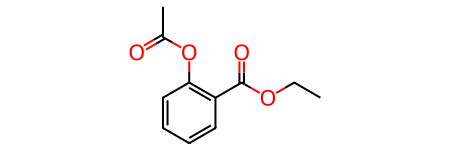

In [2]:
file ='data/aspirin.mol'
mol_mol = Chem.MolFromMolFile(file)
mol_mol

【解説】  `Chem.MolFromMolFile`メソッド  
`Chem.MolFromMolFile`メソッドは、MOLファイルからRDKitのMolオブジェクトを作成するために使用されます。

MOLファイルは分子の化学構造情報を含むテキストファイルの形式です。`Chem.MolFromMolFile`メソッドは、指定されたMOLファイルを読み込み、RDKitの`Mol`オブジェクトを返します。この`Mol`オブジェクトは、分子の構造と属性を表現するための原子や結合の情報、立体情報、分子の特性などを保持します。Molオブジェクトを使うことで、分子構造の解析や変換、また後述するフィンガープリントの分子の計算など、様々な分子情報処理の操作を行うことができます。

以下は、`Chem.MolFromMolFile`メソッドの基本的な使用例です。

~~~python
from rdkit import Chem
mol = Chem.MolFromMolFile('input.mol')
~~~

MOLファイルが不正確なフォーマットやエラーがある場合、メソッドは適切なエラーメッセージを返すか、`None`を返す場合があります。

### SMILES構造から読み込みの場合
アスピリンのSMILES（Simplified Molecular Input Line Entry System）構造は"CC(=O)Oc1ccccc1C(=O)O"となります。そのSMILESをRDKitに読み込みは以下のように行います。

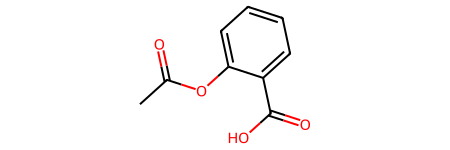

In [3]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol_smiles = Chem.MolFromSmiles(smiles)
mol_smiles

【解説】 `Chem.MolFromSmiles`メソッド  
`Chem.MolFromSmiles`メソッドは、SMILES（Simplified Molecular Input Line Entry System）形式の文字列を受け取り、それをRDKitのMolオブジェクトに変換します。

以下は、`Chem.MolFromSmiles`メソッドの基本的な使い方の例です。

```python
from rdkit import Chem

smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
```
与えられたSMILES文字列が無効な場合や解析できない場合にはNoneを返します。そのため、返り値を適切にチェックすることが重要です。

### SDFファイルからの読み込みの場合

In [4]:
file ='data/aspirin-3D-structure-CT1001395514.sdf'
sdf = Chem.SDMolSupplier(file)
sdf

In [5]:
for mol in sdf:
    if mol is not None:
        # 分子の処理
        print(Chem.MolToSmiles(mol))

CC(=O)Oc1ccccc1C(=O)O


【解説】`SDMolSupplier`メソッド
`SDMolSupplier`メソッド は、RDKitでSDF（Structure-Data File）形式のファイルを読み込むためのクラスです。

`SDMolSupplier`メソッドはイテレータとして機能し、ファイルから分子を順番に読み込むことができます。各分子は`Chem.Mol`オブジェクトとして提供されます。

以下は、`SDMolSupplier`メソッドの基本的な使い方を示す例です。

```python
from rdkit import Chem
supplier = Chem.SDMolSupplier('input.sdf')

for m in supplier:
    if m is not None:
        # 分子の処理
        print(Chem.MolToSmiles(m))
```

この例では、'input.sdf'というSDFファイルを`SDMolSupplier`で読み込みます。イテレータとして使われるため、`for`ループ内で分子を一つずつ取得することができます。

取得した分子は、`m`変数に格納されます。ただし、一部の分子は正しく読み込むことができない場合があるため、`m`が`None`でないことを確認する必要があります。

## 2. 分子構造の表示・可視化
読み込んだ分子の描画は`Chem`モジュールの配下にある`Draw`サブモジュールにツール群がまとめられいますので、`Draw`をインポートします。なお、Jupyternotebookでの描画は`IPythonConsole`をあらかじめインポートしておくとラインに表示されます。

In [6]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

### 単一の分子を表示

In [7]:
smiles = "O=C(OC(=O)c1cccc2)c12"
phthalic_anhydride = Chem.MolFromSmiles(smiles)

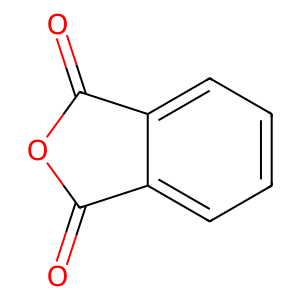

In [18]:
img = Draw.MolToImage(phthalic_anhydride)
img

【解説】`MolToImage`メソッド    
`MolToImage`メソッド は、RDKitの`Mol`オブジェクトを描画するために使用されます。以下は、`MolToImage`メソッドの基本的な使用例です。

```python
from rdkit import Chem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles('CCO')
img = Draw.MolToImage(mol)
img.show()
```

このコードでは、SMILES表記法で指定された分子を`MolFromSmiles`メソッドを使用して作成し、`MolToImage`メソッドから分子を描画します。なお、`MolToImage`メソッドはPIL（Python Imaging Library）の画像オブジェクトを返します。これより、`img.show`メソッドを使用することで画像が表示されます。

Jupyter Notebookでは、`Chem.Draw`モジュールの`IPythonConsole`をインポートさせておくことでRDKitモジュールが正しくインストールされている場合、`Mol`オブジェクトを直接表示することもできます。`Mol`オブジェクトの表示には、RDKitが組み込みのJupyter拡張機能を使用しているため、追加のコードは必要ありません。

### 複数の分子をまとめて表示
ここでは複数分子の描画について説明をいたします。MOLファイルやSMILESからmolオブジェクト化されていれば、それを`Draw.MolsToGridImage`メソッドでリスト構造で複数の分子を格子状に配置して描画できます。以下では無水フタル酸とフタル酸ジメチルの二つの分子を表示する方法です。

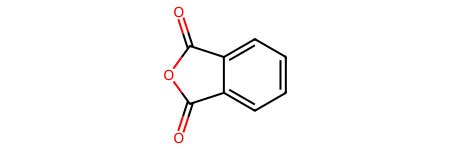

In [9]:
# 無水フタル酸
smiles = "O=C(OC(=O)c1cccc2)c12"
phthalic_anhydride = Chem.MolFromSmiles(smiles)
phthalic_anhydride

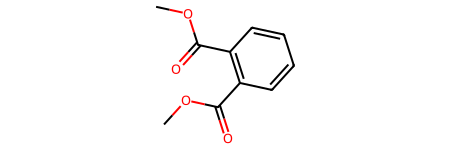

In [10]:
# フタル酸ジメチル
dimethyl_phthalate = Chem.MolFromSmiles('O=C(OC)c(c(ccc1)C(=O)OC)c1')
dimethyl_phthalate

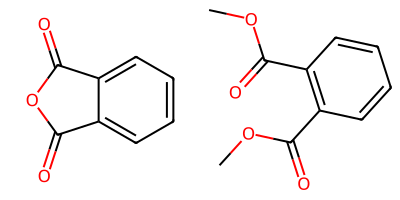

In [11]:
img2 = Draw.MolsToGridImage([phthalic_anhydride,dimethyl_phthalate], molsPerRow=2)
img2

【解説】`MolsToGridImage`メソッド 

`MolsToGridImage`メソッド は、複数のRDKitの`Mol`オブジェクトをグリッド形式の画像として描画するために使用されます。以下は、`MolsToGridImage`メソッド の基本的な使用例です。

```python
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('CNC'), Chem.MolFromSmiles('CCN')]
img = Draw.MolsToGridImage(mols, molsPerRow=3)
img.show()
```

`molsPerRow`パラメータは、1行あたりの分子の数を指定します。この例では、3つの分子が1行に表示されます。`MolsToGridImage`メソッドは、PIL（Python Imaging Library）の画像オブジェクトを返します。`img.show()`を使用することで、画像が表示されます。

`MolsToGridImage`メソッド には、さまざまなオプションがあります。たとえば、`legends`パラメータを使用して各分子のキャプションを指定したり、`highlightAtomLists`や`highlightBondLists`パラメータを使用して特定の原子や結合をハイライトしたりすることもできます。さらに、出力画像のサイズやスケーリング、カラースキームなどもカスタマイズすることができます。

### 複数の分子をまとめて表示２
続いては４つの分子についての表示例です。molsPerRow=3として横に３つの分子を配置します。

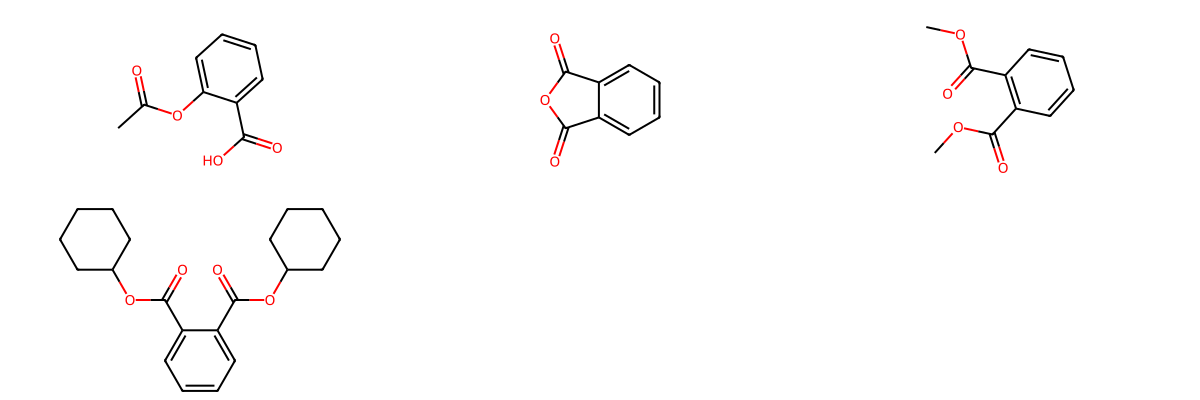

In [12]:
smiles = [
    'CC(=O)Oc1ccccc1C(=O)O',
    'O=C(OC(=O)c1cccc2)c12',
    'O=C(OC)c(c(ccc1)C(=O)OC)c1',
    'O=C(OC1CCCCC1)C2=C(C=CC=C2)C(OC3CCCCC3)=O'
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(400, 200))

【解説】`subImgSize`オプション

`subImgSize`は、`MolsToGridImage`メソッドのオプションの一つであり、それぞれの分子のサイズを指定するために使用されます。このオプションには、(width, height)という2つの値を持つタプルを指定します。

width: それぞれの分子の横幅をピクセル単位で指定します。
height: それぞれの分子の縦幅をピクセル単位で指定します。
subImgSizeオプションにより、各分子のサイズを指定することで、描画される画像内での各分子の相対的な大きさを調整することができます。これにより、画像内の分子の配置や視覚的なバランスを調整することが可能です。

## 3. 分子構造の保存
RDKitを使用して分子構造を保存するには、基本として`Mol`オブジェクトからファイルに書き出す必要があります。RDKitは複数のファイル形式に対応しており、一般的な形式としてはMOL、SDF、PDB、SMILESなどがあります。

### 1. MOLファイル形式で保存する場合：  
`MolToMolFile`モジュールを使います。SMILES表記法から`Mol`オブジェクトを作成し、`MolToMolFile`メソッドを使用してMOLファイルに保存しています。第1引数に保存する`Mol`オブジェクトを指定し、第2引数に保存するファイル名（ファイルパス）を指定します。

In [13]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
Chem.MolToMolFile(mol, './data/aspirin_rdkit.mol')

### 2. SDFファイル形式で保存する場合：
上記のコードでは、SMILES表記法から`Mol`オブジェクトを作成し、`SDWriter`メソッドよりSDFファイルに保存しています。標準ライブラリの組み込こまれている`write`メソッドを使用して`Mol`オブジェクトを書き込み、`close`メソッドを使用してファイルを閉じます。

In [14]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
writer = Chem.SDWriter('./data/aspirin_rdkit.sdf')
writer.write(mol)
writer.close()

### 3. PDBファイル形式で保存する場合：
PDBの場合は`Chem.PDBWriter`メソッドに変更するだけで、上記のSDFと変わりません。同じく、`write`メソッドを使用して`Mol`オブジェクトを書き込み、`close`メソッドを使用してファイルを閉じます。

In [15]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
mol = Chem.MolFromSmiles(smiles)
writer = Chem.PDBWriter('./data/aspirin_rdkit.pdb')
writer.write(mol)
writer.close()

### 4. SMILES形式で保存する場合：
SMILES表記はすでに文字列となっていることから、次のように標準の組み込み関数であるopen関数を使って、直接に書き出します。

In [16]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"
with open('./data/aspirin_rdkit.smi', 'w') as f:
    f.write(smiles)

### 5. 画像形式で保存する場合（JupyterNotebookのみ）：
png画像で保存する場合は、組み込み関数の`save`関数から次のように行えます。ただし、事前に`MolsToGridImage`メソッドで`returnPNG`オプションをFalseとしておくことが必要です。

In [17]:
save_images = [phthalic_anhydride,dimethyl_phthalate]
img = Draw.MolsToGridImage( save_images, molsPerRow=2,returnPNG=False)
img.save('./data//molecules.jpg')

## RDKitの公式チュートリアル
より詳しい操作などはRDKitの公式チュートリアルで学習することができます。
https://github.com/rdkit/rdkit-tutorials

#　次回  
https://colab.research.google.com/github/ARIM-Training/Training_python_4/blob/main/2_Descriptor.ipynb